In [6]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation
from scipy.integrate import solve_ivp

In [34]:
def parametrize_P(f, rho):
    sigma = 1 + rho * np.exp(rho * f)
    def P(k):
        if k==0:
            return 1 / sigma
        else:
            res = rho / sigma
            for i in range(1, k):
                res *= rho * f / i
                #print(i)
            return res
    return P

def main_func(point_num, alpha, mu, f, ax):
    rho = alpha / mu
    P_func = parametrize_P(f, rho)
    k_array = range(0, point_num)
    P_array = []
    for i in k_array:
        #print("aaaaa", i)
        P_array.append(P_func(i))

    ax.plot(k_array, P_array)
    print("Probabilty of wating: ", 1 - P_array[0], ', alpha = ', alpha, ', mu = ', mu, ', f = ', f )

    return ax

    

Probabilty of wating:  0.181022109438993 , alpha =  0.1 , mu =  0.5 , f =  0.5
Probabilty of wating:  0.9838481649468426 , alpha =  0.5 , mu =  0.1 , f =  0.5
Probabilty of wating:  0.6224593312018546 , alpha =  0.5 , mu =  0.5 , f =  0.5
Probabilty of wating:  0.52497918747894 , alpha =  0.5 , mu =  0.5 , f =  0.1


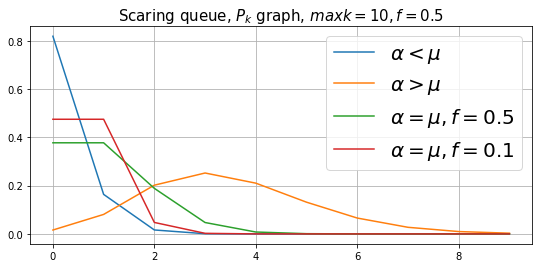

In [51]:

fig, (ax1) = plt.subplots(nrows=1, figsize=(9,4))

main_func(10, 0.1, 0.5, 0.5, ax1)
main_func(10, 0.5, 0.1, 0.5, ax1)
main_func(10, 0.5, 0.5, 0.5, ax1)
main_func(10, 0.5, 0.5, 0.1, ax1)

ax1.legend([r'$\alpha < \mu$', r'$\alpha > \mu$', r'$\alpha = \mu, f = 0.5$', r'$\alpha = \mu, f = 0.1$' ], fontsize=20)
ax1.set_title(r'Scaring queue, $P_k$ graph, $max k = 10, f = 0.5$', fontsize = 15)
ax1.grid()

Вывод:

Из графиков можно наблюдать, что при частоном случае пугающей очереди, когда имеется одно обслуживающее устройство, и вероятность, что заявка останется в очереди $= f/n$, $0 < f < 1$, так же как и во всех остальных случаях, при возрастании параметра $\mu$ снижается вероятность простоя заявки в очереди, что так же можно заметить и на графике. 
Видно, что при $\alpha < \mu$ выше всего вероятность того, что в очереди будет 0 заявок. 

На практике, мы можем менять только параметр $\mu$ и соответсвенно, нужно стремиться к тому, чтобы в очереди было либо 0, либо 1 заявка, это достигается при $\mu \approx \alpha$